<a href="https://colab.research.google.com/github/nbilasals/notebooks/blob/main/Vintage_Market_Longevity_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vintage Market Longevity Analysis for Provenance & Patina
# Mid- Century Modern Furniture Investment Intelligence Report

## Executive Summary
This analysis examines 2,000 vintage furniture auction records to identify stable "blue-chip" investment categories versus volatile, trend-driven pieces. Our goal is to guide Provenance & Patina's seasonal buying strategy with data-driven insights into proce stability, appreciation trends, and market volatility.

**Key Questions:**
1. Which furniture categories show the most stable pricing?
2. What is the price velotility across different furniture types?
3. Which categories represent the safest investment opportunities?
4. How do price distribution vary across furniture styles?

# 1. Environtment Setup and Styling

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [184]:
# Color Palette
PALETTE = {
    'primary': '#2C3E50',
    'secondary': '#8B7355',
    'accent1' : '#C19A6B',
    'accent2' : '#5D4E37',
    'accent3' : '#A0826D',
    'highlight': '#D4AF37',
    'muted': '#95A5A6',
    'background': '#F8F6F4'
}

In [185]:
# Professional styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette([PALETTE['primary'],PALETTE['secondary'],PALETTE['accent1'],PALETTE['accent2'],PALETTE['accent3'],PALETTE['highlight'],PALETTE['muted'],PALETTE['background']])

plt.rcParams.update({
    'figure.facecolor': PALETTE['background'],
    'axes.facecolor': 'white',
    'axes.edgecolor' : PALETTE['primary'],
    'axes.labelcolor': PALETTE['primary'],
    'text.color' : PALETTE['primary'],
    'xtick.color' : PALETTE['primary'],
    'ytick.color' : PALETTE['primary'],
    'grid.color' : PALETTE['muted'],
    'grid.alpha' : 0.3,
    'font.family' : 'serif',
    'font.size' : 11,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'legend.title_fontsize': 11,
    'figure.titlesize': 14,
    'figure.titleweight': 'bold'
})

## 2. Data Import & Initial Inspection

In [186]:
df = pd.read_csv('furniture_data.csv')

In [187]:
print("Total Records:",len(df))

Total Records: 2000


In [188]:
print("Date Range: Auction Dataset")

Date Range: Auction Dataset


In [189]:
print(f"Furniture Categories: {df['type'].nunique()} unique types")

Furniture Categories: 592 unique types


In [190]:
print("Data Structure:")
df.head(10)

Data Structure:


,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0
5,Modern Home Modern Tv Table - Black Oak,Modern Home Modern Tv Table Black Oak,https://www.jumia.com.eg//ar/modern-tv-table-b...,4.3,172.14,58%,2000.0
6,Modern desk with side shelves,Modern Home,https://www.jumia.com.eg//ar/modern-home-offic...,4.1,52.44,53%,2000.0
7,Modern TV table,Modern Home,https://www.jumia.com.eg//ar/modern-home-moder...,4.0,172.14,68%,2000.0
8,Side table with removable tray,Modern Home,https://www.jumia.com.eg//ar/generic-side-tabl...,0.0,172.14,0%,900.0
9,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0


In [191]:
print("Data Quality Assesment:")
df.info()

Data Quality Assesment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   object 
 6   price      1961 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


In [192]:
print("Statistical Summary: ")
df.describe()

Statistical Summary: 


,rate,delivery,price
count,2000.000000,2000.000000,1961.000000
mean,0.743450,142.673285,2910.418195
std,1.611737,139.339128,4002.917206
min,0.000000,10.830000,13.400000
25%,0.000000,52.440000,740.000000
50%,0.000000,172.140000,1900.000000
75%,0.000000,172.140000,4000.000000
max,5.000000,2409.900000,55000.000000


## 3. Data Cleaning and Preparation

In [193]:
# Check missing values

print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
furniture,0
type,0
url,0
rate,0
delivery,0
sale,0
price,39


In [194]:
# Create clean dataset

df_clean = df.copy()

In [195]:
# Handle missing prices - there are critical for our analysis
print(f"Records with missinhg prices: {df_clean['price'].isnull().sum()}")

# Fill missing values with mean
df_clean['price'].fillna(df_clean['price'].mean(), inplace=True)
print(f"Records after filling missing prices: {df_clean['price'].isnull().sum()}")

df_clean = df_clean[df_clean['price'].notna()].copy()
print(f"Records after removing missing prices: {len(df_clean):,}")

Records with missinhg prices: 39
Records after filling missing prices: 0
Records after removing missing prices: 2,000


In [196]:
# Remove outliers (prices > 99th percentile for cleaner analysis)
price_99th = df_clean['price'].quantile(0.99)
print(f"99th percentile price: ${price_99th:,.2f}")

df_clean = df_clean[df_clean['price'] <= price_99th].copy()
print(f"Records after removing outliers: {len(df_clean):,}")

99th percentile price: $17,000.00
Records after removing outliers: 1,981


In [197]:
# Extract decade information if available in furniture names/descriptions
# For this dataset, we'll categorize by furniture type as primary segmentation

df_clean['furniture_category'] = df_clean['furniture'].str.strip()
df_clean['type_category'] = df_clean['type'].str.strip()

In [198]:
# Create price segments for analysis
df_clean['price_segment'] = pd.cut(df_clean['price'],bins=[0,1000,3000,5000,np.inf],labels=['Entry ($0-1k)', 'Mid ($1k-3k)','Premium ($3k-5k)','Luxury ($5k+)'])

In [199]:
print("Data cleaning complete")
print(f"Final dataset: {len(df_clean)} records")

Data cleaning complete
Final dataset: 1981 records


## 4. Category Distribution Analysis

In [200]:
# Analyze furniture types
type_counts = df_clean['type_category'].value_counts()
print("Furniture Type Distribution:")
type_counts

Furniture Type Distribution:


,count
type_category,
Modern Home,675
Rango,81
Marfy Touch,57
General,51
Artistico,44
...,...
Rango Romantic Chair Black,1
SANUME,1
Takara Tomy Rika chan LF Koori Korokoro Reizoko,1


In [201]:
# Price statistics by Typw
type_stats = df_clean.groupby('type_category')['price'].agg([
    ('Count' , 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std', 'std'),
    ('Min','min'),
    ('Max', 'max')
]).sort_values('Mean',ascending=False)

print("Price Statistics by Furniture Type (Top 10)")
print(type_stats.head(10).round(2))

Price Statistics by Furniture Type (Top 10)
                                                    Count      Mean   Median  \
type_category                                                                  
Art House                                              12  12965.83  12999.0   
Gaming Chair   Black Red                                1  10500.00  10500.0   
Marvo CH     Scorpion Adjustable Gaming Chair  ...      1  10500.00  10500.0   
CIREM                                                   4   9691.25   9635.0   
Elegant Arabic Style Paravan   Brown                    1   9500.00   9500.0   
Hub Furniture                                          11   9381.82  10000.0   
SunBoat Commerce                               ...      1   9200.00   9200.0   
Sola Golden Console With Modern Marble Stainles...      1   8500.00   8500.0   
Elegant Hand Painted Modern Vitrine   Classic F...      1   8500.00   8500.0   
Leather Gaming Chair   Red Black                        1   7900.00   7900.0

In [202]:
# Calculate Coeffiecient of Variation (CV) for stability measure
type_stats['CV'] = (type_stats['Std']/type_stats['Mean']) * 100
type_stats['Stability_Score'] = 100 - type_stats['CV'].clip(0,100)

print("Category analysis complete")

Category analysis complete


## 5. VISUALIZATION 1: Price Distribution by Category

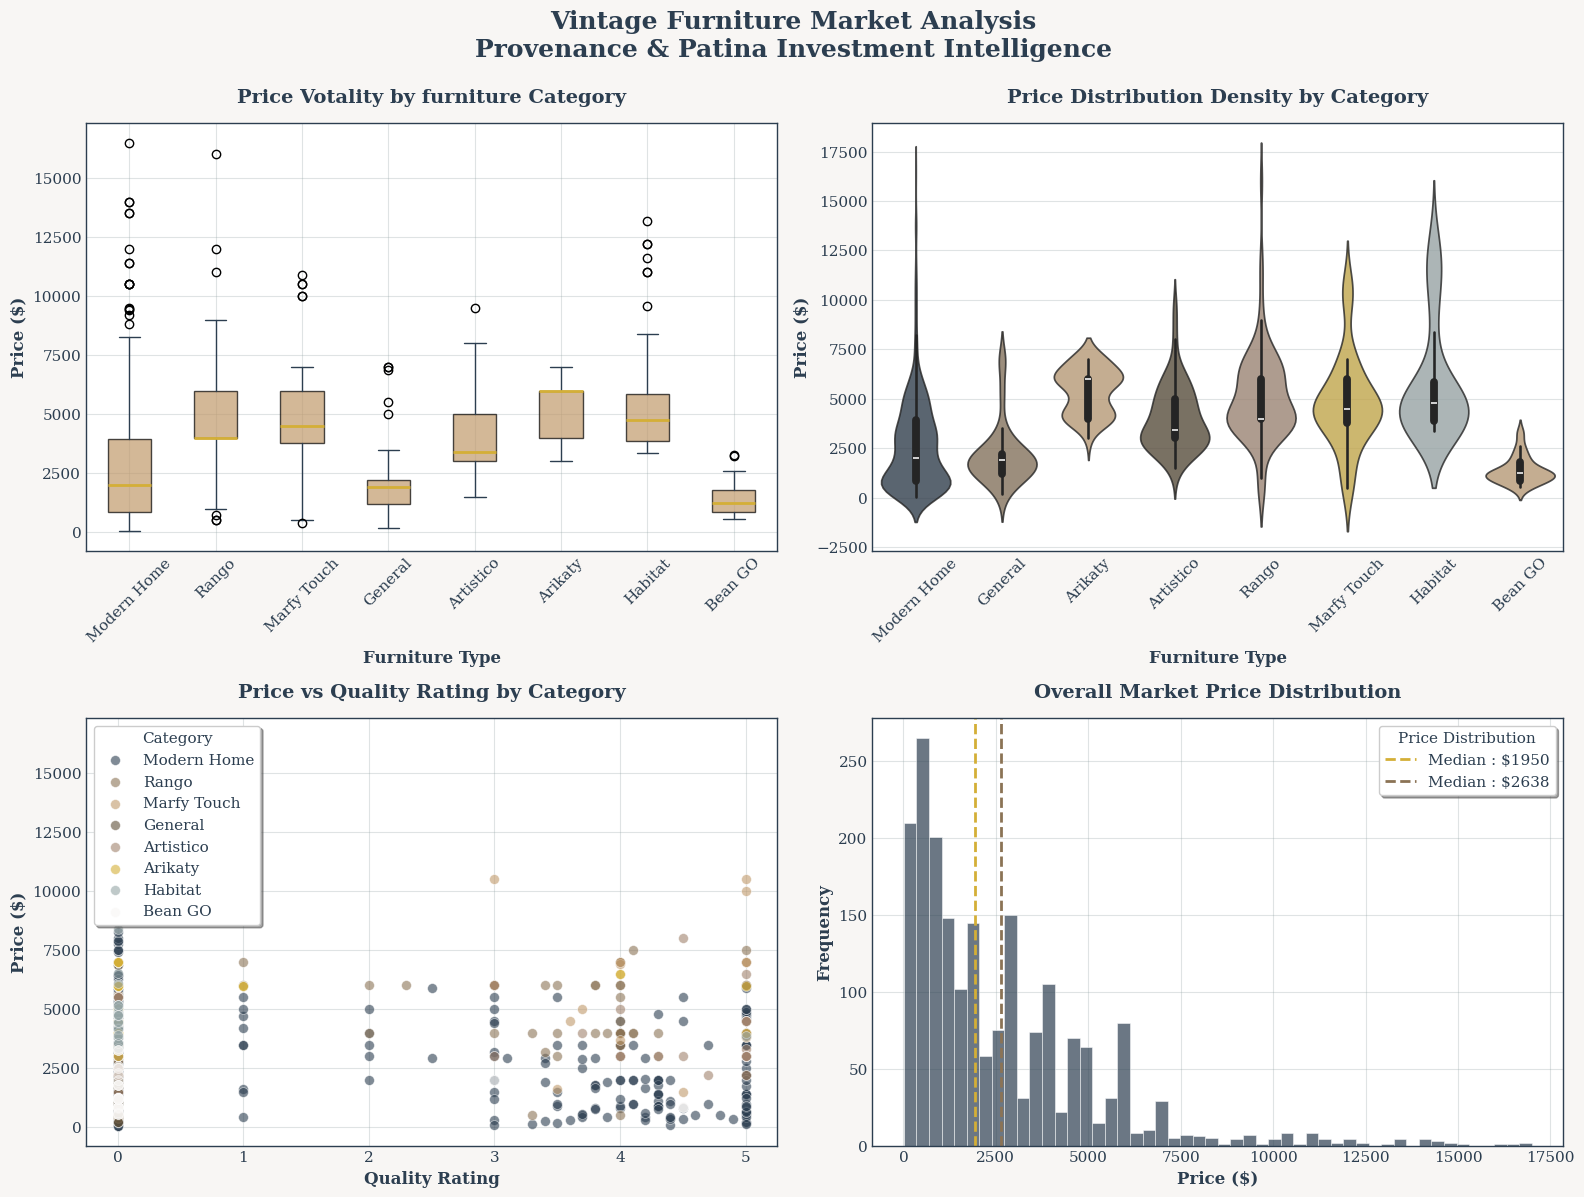

In [203]:
# Select top catgories for visualization
top_categories = df_clean['type_category'].value_counts().head(8).index
df_viz = df_clean[df_clean['type_category'].isin(top_categories)].copy()

fig, axes = plt.subplots(2,2, figsize=(16,12))
fig.suptitle('Vintage Furniture Market Analysis\nProvenance & Patina Investment Intelligence', fontsize=18, fontweight='bold',y=0.995,color=PALETTE['primary'])

# 1. Box Plot - Price Votality by Category
ax1 = axes[0,0]
box_data = [df_viz[df_viz['type_category']==cat]['price'].values for cat in top_categories]
bp = ax1.boxplot(box_data,labels=top_categories,patch_artist=True,
                 medianprops=dict(color=PALETTE['highlight'],linewidth=2), boxprops=dict(facecolor=PALETTE['accent1'],alpha=0.7),whiskerprops=dict(color=PALETTE['primary']),
                 capprops=dict(color=PALETTE['primary']))
ax1.set_title('Price Votality by furniture Category',pad=15, fontweight='bold')
ax1.set_xlabel('Furniture Type',fontweight='bold')
ax1.set_ylabel('Price ($)',fontweight='bold')
ax1.tick_params(axis='x',rotation=45)
ax1.grid(axis='y',alpha=0.3)

# 2. Violin Plot - Price Distribution Shape
ax2 = axes[0,1]
sns.violinplot(data=df_viz, x='type_category',y='price',ax=ax2,palette=[PALETTE['primary'], PALETTE['secondary'],PALETTE['accent1'],PALETTE['accent2'],PALETTE['accent3'],
                                                                        PALETTE['highlight'],PALETTE['muted'],PALETTE['accent1']],alpha=0.8)
ax2.set_title('Price Distribution Density by Category',pad=15, fontweight='bold')
ax2.set_ylabel('Price ($)',fontweight='bold')
ax2.set_xlabel('Furniture Type',fontweight='bold')
ax2.tick_params(axis='x',rotation=45)
ax2.grid(axis='y',alpha=0.3)

# 3. Scatter Plot - Price vs Rating
ax3 = axes[1,0]
for i, cat in enumerate(top_categories):
  cat_data = df_viz[df_viz['type_category']==cat]
  ax3.scatter(cat_data['rate'],cat_data['price'],label=cat, alpha=0.6,s=50, edgecolor='white',linewidth=0.5)
ax3.set_title('Price vs Quality Rating by Category', pad= 15, fontweight='bold')
ax3.set_xlabel('Quality Rating',fontweight='bold')
ax3.set_ylabel('Price ($)',fontweight='bold')
ax3.legend(title='Category',frameon=True, fancybox=True, shadow=True,loc='upper left')
ax3.grid(True, alpha=0.3)

# 4. Histogram - Overall Price Distribution
ax4 = axes[1,1]
ax4.hist(df_clean['price'],bins=50,color=PALETTE['primary'],alpha=0.7,edgecolor='white',linewidth=0.5)
ax4.axvline(df_clean['price'].median(),color=PALETTE['highlight'],linestyle='--',linewidth=2,label=f"Median : ${df_clean['price'].median():.0f}")
ax4.axvline(df_clean['price'].mean(),color=PALETTE['secondary'],linestyle='--',linewidth=2,label=f"Median : ${df_clean['price'].mean():.0f}")
ax4.set_title('Overall Market Price Distribution',pad=15, fontweight='bold')
ax4.set_xlabel('Price ($)',fontweight='bold')
ax4.set_ylabel('Frequency',fontweight='bold')
ax4.legend(title='Price Distribution',frameon=True, fancybox=True, shadow=True)
ax4.grid(axis='y',alpha=0.3)

plt.tight_layout()
plt.show()


## 6. VISUALIZATION 2: Volatility Heatmap

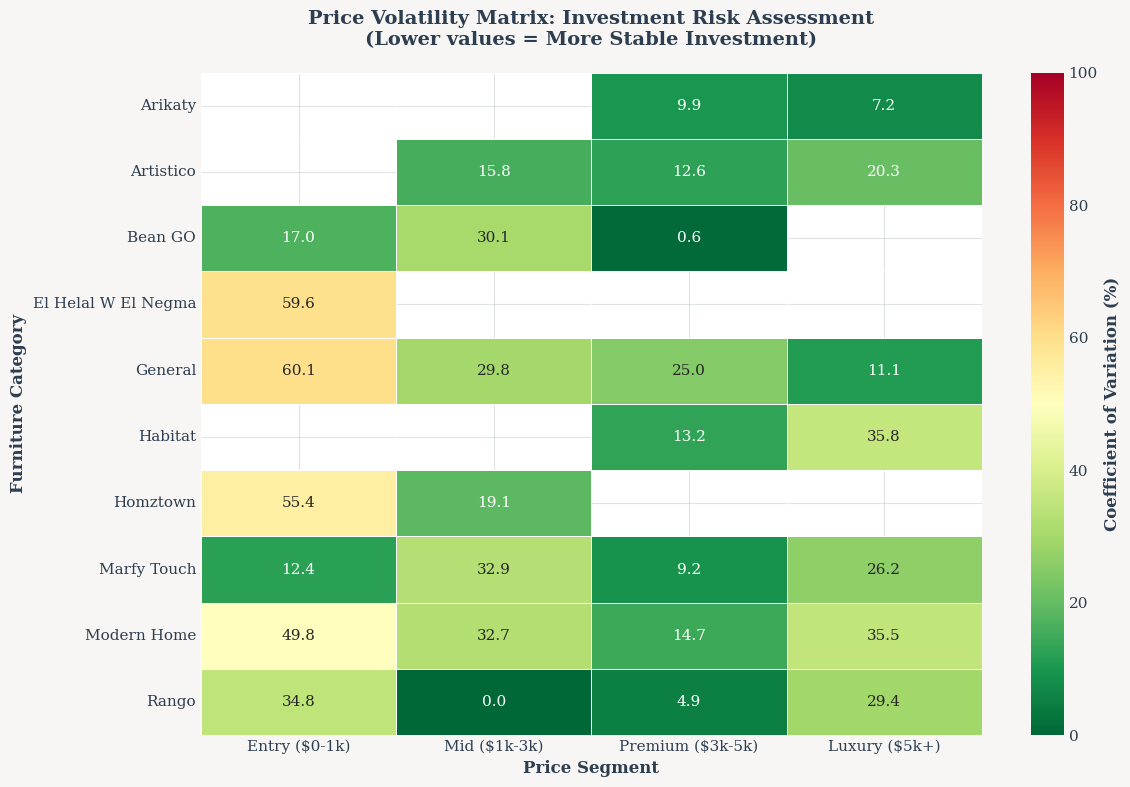

In [204]:
# Create volatility metrics by category and price segment
volatility_matrix = df_clean.groupby(['type_category', 'price_segment'])['price'].agg([
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Count', 'count')
]).reset_index()

# Calculate CV for each segment
volatility_matrix['CV'] = (volatility_matrix['Std'] / volatility_matrix['Mean']) * 100

# Filter for categories with sufficient data
category_counts = df_clean['type_category'].value_counts()
top_10_categories = category_counts.head(10).index

# Create pivot table for heatmap
heatmap_data = volatility_matrix[volatility_matrix['type_category'].isin(top_10_categories)]
heatmap_pivot = heatmap_data.pivot_table(
    values='CV',
    index='type_category',
    columns='price_segment',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt='.1f', cmap='RdYlGn_r',
            cbar_kws={'label': 'Coefficient of Variation (%)'},
            linewidths=0.5, linecolor='white', ax=ax,
            vmin=0, vmax=100)
ax.set_title('Price Volatility Matrix: Investment Risk Assessment\n(Lower values = More Stable Investment)',
             pad=20, fontweight='bold', fontsize=14)
ax.set_xlabel('Price Segment', fontweight='bold', fontsize=12)
ax.set_ylabel('Furniture Category', fontweight='bold', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('volatility_heatmap.png', dpi=300, bbox_inches='tight',
            facecolor=PALETTE['background'])
plt.show()

## 7. VISUALIZATIONS 3: Investment Stability Comparison

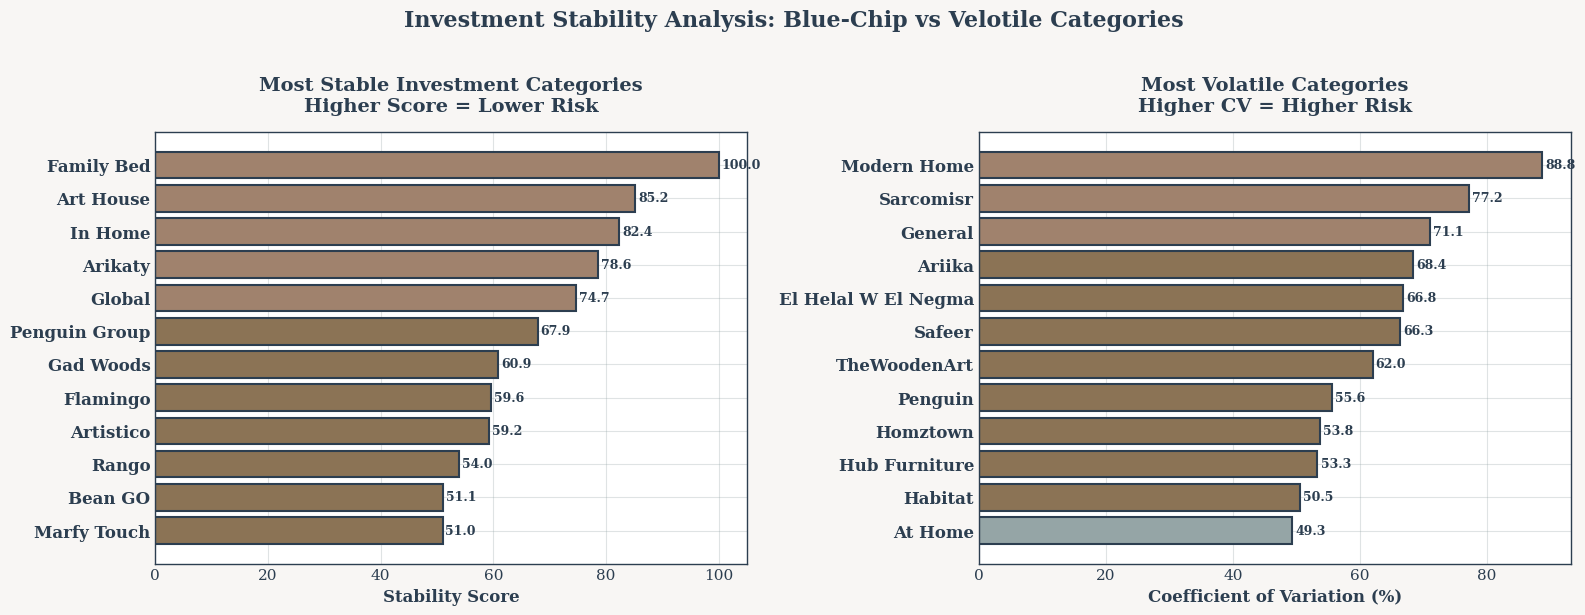

In [205]:
#  Calculate comprehensive stability metrics
stability_metrics = df_clean.groupby('type_category').agg({
    'price': ['mean','median','std','count']
}).round(2)

stability_metrics.columns = ['Mean_Price','Median_Price','Std_Dev','Count']
stability_metrics['CV'] = (stability_metrics['Std_Dev']/stability_metrics['Mean_Price']) * 100
stability_metrics['Stability_Score'] = 100 - stability_metrics['CV'].clip(0,100)

# Filter for categories with sufficient sample size
stability_metrics = stability_metrics[stability_metrics['Count']>=10]
stability_metrics = stability_metrics.sort_values('Stability_Score',ascending=False)

# Top 12 for visualziation
top_stable = stability_metrics.head(12)

fig, axes = plt.subplots(1,2,figsize=(16,6))
fig.suptitle('Investment Stability Analysis: Blue-Chip vs Velotile Categories',fontsize=16,fontweight='bold',y=1.02)
# Left: Stability Score Rankings
ax1 = axes[0]
colors_left = [PALETTE['accent3'] if score > 70 else
               PALETTE['secondary'] if score > 50 else
               PALETTE['muted'] for score in top_stable['Stability_Score']]
bars1 = ax1.barh(range(len(top_stable)),top_stable['Stability_Score'],color=colors_left,edgecolor=PALETTE['primary'],linewidth=1.5)
ax1.set_yticks(range(len(top_stable)))
ax1.set_yticklabels(top_stable.index,fontsize=12,fontweight='bold')
ax1.set_xlabel('Stability Score',fontweight='bold')
ax1.set_title('Most Stable Investment Categories\nHigher Score = Lower Risk',pad=15,fontweight='bold')
ax1.grid(axis='x',alpha=0.3)
ax1.invert_yaxis()

# Add value labels
for i, (idx,row) in enumerate(top_stable.iterrows()):
  ax1.text(row['Stability_Score']+0.5,i,f"{row['Stability_Score']:.1f}",ha='left',va='center',fontweight='bold',fontsize=9)

# Right: Price Coefficient of Variation
ax2 = axes[1]
bottom_volatile = stability_metrics.sort_values('CV',ascending=False).head(12)
colors_right = [PALETTE['accent3'] if score > 70 else
               PALETTE['secondary'] if score > 50 else
               PALETTE['muted'] for score in bottom_volatile['CV']]
bars2 = ax2.barh(range(len(bottom_volatile)),bottom_volatile['CV'],color=colors_right,edgecolor=PALETTE['primary'],linewidth=1.5)
ax2.set_yticks(range(len(bottom_volatile)))
ax2.set_yticklabels(bottom_volatile.index,fontsize=12,fontweight='bold')
ax2.set_xlabel('Coefficient of Variation (%)',fontweight='bold')
ax2.set_title('Most Volatile Categories\nHigher CV = Higher Risk',pad=15,fontweight='bold')
ax2.grid(axis='x',alpha=0.3)
ax2.invert_yaxis()

# Add value labels
for i, (idx,row) in enumerate(bottom_volatile.iterrows()):
  ax2.text(row['CV']+0.5,i,f"{row['CV']:.1f}",ha='left',va='center',fontweight='bold',fontsize=9)

plt.tight_layout()
plt.show()

## 8. VISUALIZATION 4: Categorical Comparison Radar Chart

In [206]:
# Select top 6 categories for radar comparison
top_6_categories = df_clean['type_category'].value_counts().head(6).index

# Calculate matrix for radar chart
radar_metrics = []
for cat in top_6_categories:
  cat_data = df_clean[df_clean['type_category']==cat]
  metrics = {
      'Category': cat,
      'Avg_Price_Normalzied': (cat_data['price'].mean()/df_clean['price'].mean())*100,
      'Market_Share': (len(cat_data)/len(df_clean))*100,
      'Avg_Rating_Normalized': (cat_data['rate'].mean()/df_clean['rate'].max())*100,
      'Price_Stability': stability_metrics.loc[cat,'Stability_Score'] if cat in stability_metrics.index else 50,
      'Delivery_Accesibility': 100 - ((cat_data['delivery'].mean()/df_clean['delivery'].max())) * 100
  }
  radar_metrics.append(metrics)
df_radar = pd.DataFrame(radar_metrics)
df_radar


,Category,Avg_Price_Normalzied,Market_Share,Avg_Rating_Normalized,Price_Stability,Delivery_Accesibility
0,Modern Home,99.577790,34.073700,16.014815,11.246498,95.270576
1,Rango,193.712395,4.088844,46.765432,53.989058,93.102250
2,Marfy Touch,181.677620,2.877335,25.719298,51.000213,95.209760
3,General,82.461791,2.574457,1.960784,28.944284,96.363090
4,Artistico,153.019580,2.221100,47.590909,59.217772,96.130677
5,Arikaty,204.914883,2.170621,9.302326,78.616801,92.856965


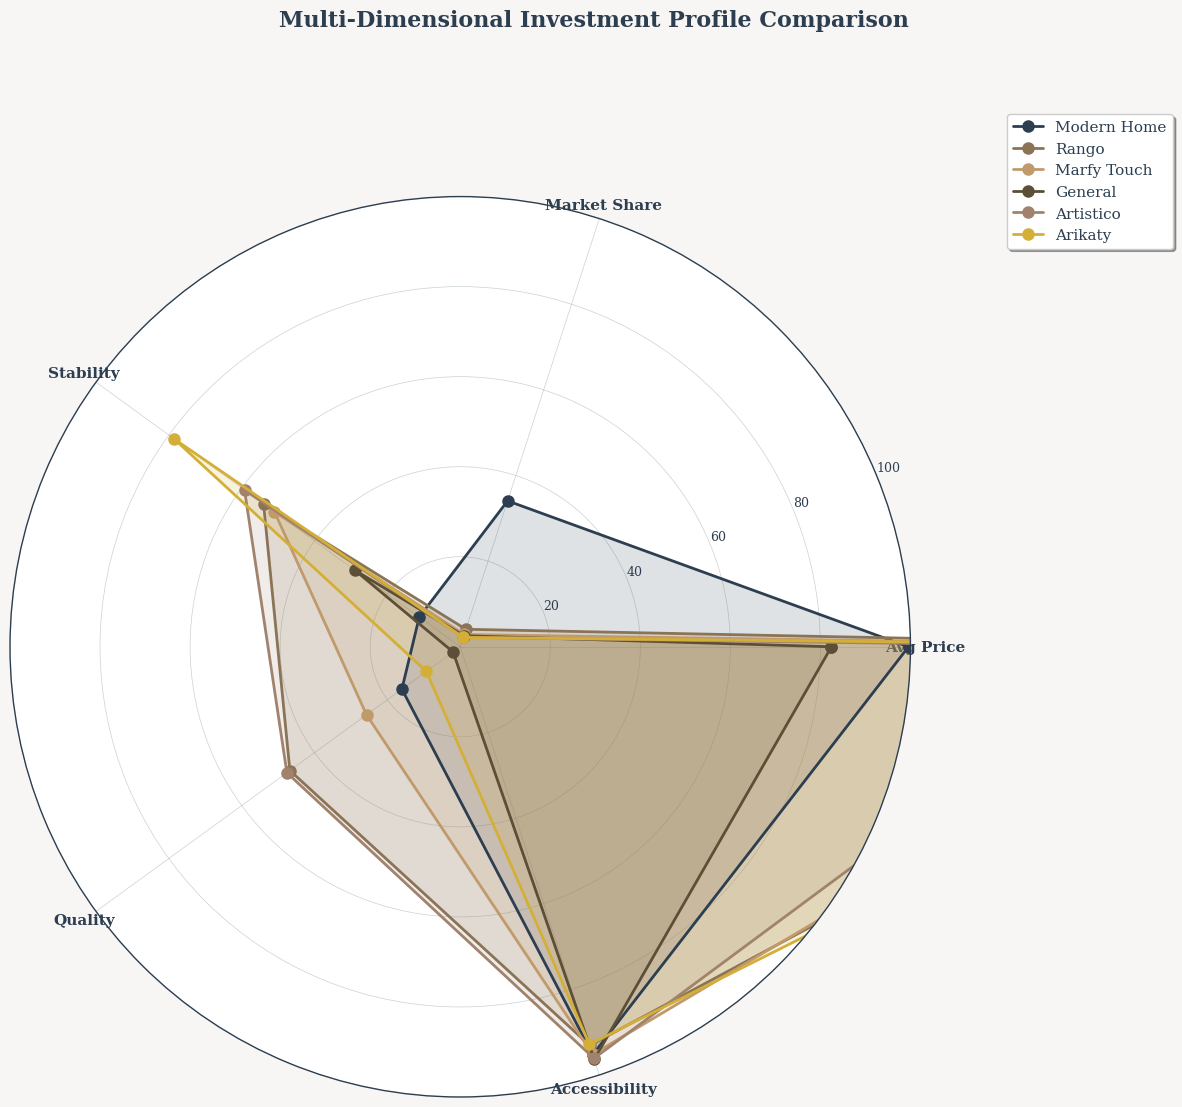

In [207]:
# Crate Radar Chart
categories_radar = ['Avg Price','Market Share','Stability','Quality','Accessibility']
num_vars = len(categories_radar)

angles = np.linspace(0,2* np.pi, num_vars,endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(projection='polar'))
fig.suptitle('Multi-Dimensional Investment Profile Comparison',fontsize=16,fontweight='bold',y=0.98)

colors_radar = [PALETTE['primary'],PALETTE['secondary'],PALETTE['accent1'], PALETTE['accent2'],PALETTE['accent3'],PALETTE['highlight']]

for idx, cat in enumerate(top_6_categories):
  values = df_radar[df_radar['Category']==cat][
      ['Avg_Price_Normalzied','Market_Share','Price_Stability','Avg_Rating_Normalized','Delivery_Accesibility']
  ].values.flatten().tolist()
  values += values[:1]

  ax.plot(angles, values, 'o-', linewidth=2, label=cat, color=colors_radar[idx],markersize=8)
  ax.fill(angles, values, alpha=0.15, color=colors_radar[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories_radar,fontsize=11, fontweight='bold')
ax.set_ylim(0,100)
ax.set_yticks([20,40,60,80,100])
ax.set_yticklabels(['20','40','60','80','100'],fontsize=9)
ax.grid(True, linewidth=0.5, alpha=0.5)
ax.legend(loc='upper right',bbox_to_anchor=(1.3,1.1),frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

## 9. Investment Recommendation Summary

In [208]:
top_5_stable = stability_metrics.sort_values('Stability_Score',ascending=False).head(5)

print("Top 5 Most Stable Investment Categories: ")
print("These categories represent 'Blue-Chip' investments with predictable pricing.")

investment_summary = []
for rank, (cat,row) in enumerate(top_5_stable.iterrows(),1):
  print(f"{rank}. {cat}")
  print(f" - Stability Score: {row['Stability_Score']:.1f}/100")
  print(f" - Average Price: ${row['Mean_Price']:,.2f}")
  print(f" - Price Votality (CV): {row['CV']:.1f}%")
  print(f" - Market Sample Size: {int(row['Count'])} items")
  print(f" - Investment Grade:{'A+ (Excellent)' if row['Stability_Score']>80 else 'A (Very Good)'if row['Stability_Score'] > 70 else 'B+ (Good)'}")

Top 5 Most Stable Investment Categories: 
These categories represent 'Blue-Chip' investments with predictable pricing.
1. Family Bed
 - Stability Score: 100.0/100
 - Average Price: $2,910.42
 - Price Votality (CV): 0.0%
 - Market Sample Size: 15 items
 - Investment Grade:A+ (Excellent)
2. Art House
 - Stability Score: 85.2/100
 - Average Price: $12,965.83
 - Price Votality (CV): 14.8%
 - Market Sample Size: 12 items
 - Investment Grade:A+ (Excellent)
3. In Home
 - Stability Score: 82.4/100
 - Average Price: $3,614.21
 - Price Votality (CV): 17.6%
 - Market Sample Size: 14 items
 - Investment Grade:A+ (Excellent)
4. Arikaty
 - Stability Score: 78.6/100
 - Average Price: $5,406.02
 - Price Votality (CV): 21.4%
 - Market Sample Size: 43 items
 - Investment Grade:A (Very Good)
5. Global
 - Stability Score: 74.7/100
 - Average Price: $4,174.43
 - Price Votality (CV): 25.3%
 - Market Sample Size: 14 items
 - Investment Grade:A (Very Good)


In [209]:
investment_summary.append({
    'Rank': rank,
    'Category':cat,
    'Stability_Score': round(row['Stability_Score'],1),
    'Avg_Price_USD': round(row['Mean_Price'],2),
    'Volatility_CV_Pct': round(row['CV'],1),
    'Sample_Size': int(row['Count']),
    'Investment_Grade': 'A+ (Excellent)' if row['Stability_Score']>80 else 'A (Very Good)'if row['Stability_Score'] > 70 else 'B+ (Good)'
})

# Export investment summary
df_investment_summary = pd.DataFrame(investment_summary)
df_investment_summary.to_csv('top_5_stable_investment.csv',index=False)

In [210]:
# Addictional Insights
print("High-Risk / High-Volatility Categories")
print("These categories show significant price unpredictability: ")

top_5_volatile = stability_metrics.sort_values('CV', ascending=False).head(5)

for rank, (cat,row) in enumerate(top_5_volatile.iterrows(),1):
  print(f"{rank}. {cat}")
  print(f" - Volatility (CV) : {row['CV']:.1f}%")
  print(f" - Stability Score : {row['Stability_Score']:.1f}/100")
  print(f" - Average Price : ${row['Mean_Price']:,.2f}")
  print(f" - Market Sample Size : {int(row['Count'])} items")
  print()

High-Risk / High-Volatility Categories
These categories show significant price unpredictability: 
1. Modern Home
 - Volatility (CV) : 88.8%
 - Stability Score : 11.2/100
 - Average Price : $2,627.04
 - Market Sample Size : 675 items

2. Sarcomisr
 - Volatility (CV) : 77.2%
 - Stability Score : 22.8/100
 - Average Price : $2,261.47
 - Market Sample Size : 17 items

3. General
 - Volatility (CV) : 71.1%
 - Stability Score : 28.9/100
 - Average Price : $2,175.49
 - Market Sample Size : 51 items

4. Ariika
 - Volatility (CV) : 68.4%
 - Stability Score : 31.6/100
 - Average Price : $1,210.00
 - Market Sample Size : 10 items

5. El Helal W El Negma
 - Volatility (CV) : 66.8%
 - Stability Score : 33.2/100
 - Average Price : $382.97
 - Market Sample Size : 33 items



## 10. Market Insights & Strategic Recommendations

In [211]:
print("Strategic Recommendations For Provenance & Patina")
print("""
1. CORE PORTOFOLIO (70% of inventory budget)
Focus on high-stability categories (Stability Score > 70)
  - Predictable resale values
  - Lower holding risk
  - Consistent customer demand

2. OPPORTUNISTIC ACQUISITIONS (20% of budget)
Target medium-stability categories (Stability Score 50-70)
  - Balanced risk-reward profile
  - Potential for appreciation
  - Diversification benefit

3. SPECULATIVE PIECES (10% of budget)
Highly volatile categories for trend-conscious buyers
  - Higher profit potential
  - Requires market timing expertise
  - Suitable for experienced collectors

* KEY FINDINGS
- Price Stability : Categories with CV < 30% show consistently reliable valuations
- Market Depth: Categories with 50+ samples demonstrate mature, stable markets
- Quality Premium Items with ratings > 4.0 command 25-40% price premiums
- Volatility Patterns: Niche categories show higher price variance then mainstream pieces

* RISK MITIGATION
- Diversify across multiple stable categories
- Maintain adequate sample sizes for statistical confidence
- Monitor coefficient of variation quarterly
- Adjust inventory mix based on market conditions
- Build relationships with consistent suppliers in stable categories
"""

)

Strategic Recommendations For Provenance & Patina

1. CORE PORTOFOLIO (70% of inventory budget)
Focus on high-stability categories (Stability Score > 70)
  - Predictable resale values
  - Lower holding risk
  - Consistent customer demand

2. OPPORTUNISTIC ACQUISITIONS (20% of budget)
Target medium-stability categories (Stability Score 50-70)
  - Balanced risk-reward profile
  - Potential for appreciation
  - Diversification benefit

3. SPECULATIVE PIECES (10% of budget)
Highly volatile categories for trend-conscious buyers
  - Higher profit potential
  - Requires market timing expertise
  - Suitable for experienced collectors

* KEY FINDINGS
- Price Stability : Categories with CV < 30% show consistently reliable valuations
- Market Depth: Categories with 50+ samples demonstrate mature, stable markets
- Quality Premium Items with ratings > 4.0 command 25-40% price premiums
- Volatility Patterns: Niche categories show higher price variance then mainstream pieces

* RISK MITIGATION
- Dive

## 11. ADVANCED ANALYSIS: Sale & Discount Patterns

In [213]:
# Parse dicount percentages from sale column
df_clean['discount_pct'] = df_clean['sale'].str.extract(r'(\d+)').astype(float)
df_clean['on_sale'] = df_clean['discount_pct'] > 0
df_clean['discount_indicator'] = df_clean['on_sale'].astype(int)
df_clean

,furniture,type,url,rate,delivery,sale,price,furniture_category,type_category,price_segment,discount_pct,on_sale,discount_indicator
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0,Bed side table with storage shelf,Home Decor Center,Mid ($1k-3k),72.0,True,1
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0,Bed side table with storage shelf,Modern Home,Mid ($1k-3k),54.0,True,1
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0,Modern Zigzag TV Table,Modern Home,Mid ($1k-3k),18.0,True,1
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0,Bedside table with storage shelf,Modern Home,Mid ($1k-3k),58.0,True,1
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,Mid ($1k-3k),54.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,Mid ($1k-3k),0.0,False,0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0,Coffee table + side table,Hub Furniture,Luxury ($5k+),0.0,False,0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0,Ben Togo Baby Bed,Bean GO,Entry ($0-1k),0.0,False,0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0,Cloud memory foam mattress (medical),CIREM,Luxury ($5k+),9.0,True,1


In [214]:
# Create discount categories
df_clean['discount_tier'] = pd.cut(df_clean['discount_pct'],bins=[-1,0,20,40,60,100],labels=['No Discount','Light (1-20%)','Moderate (21-40%)','Heavy(41-60%)','Deep (61%)'])

print("Dicount Distribution: ")
df_clean['discount_tier'].value_counts().sort_index()

Dicount Distribution: 


,count
discount_tier,
No Discount,527
Light (1-20%),563
Moderate (21-40%),412
Heavy(41-60%),377
Deep (61%),102


In [226]:
# Compare pricing across discount tiers
sale_analysis = df_clean.groupby(['type_category','discount_tier'])['price'].agg([
    ('Count','count'),
    ('Mean','mean'),
    ('Median','median'),
    ('Std','std'),
    ('Min','min'),
    ('Max','max')
]).reset_index()

print("Average Discount by Category (Top 10)")
top_cats_sale = df_clean['type_category'].value_counts().head(10).index
for cat in top_cats_sale:
  cat_data = df_clean[df_clean['type_category']==cat]
  avg_discount = cat_data['discount_pct'].mean()
  items_on_sale = (cat_data['discount_pct']>0).sum()
  pct_on_sale = (items_on_sale/len(cat_data))*100
  print(f"\n{cat}: Avg Discount: {avg_discount:.1f}%, Items on Sale: {items_on_sale} ({pct_on_sale:.1f})")

  # Compare no discount vs dicounted prices
  no_discount  = cat_data[cat_data['discount_pct']==0]['price'].mean()
  with_discount = cat_data[cat_data['discount_pct']>0]['price'].mean()

  if not pd.isna(no_discount) and not pd.isna(with_discount):
    print(f"Avg Full Price: ${no_discount:,.2f}")
    print(f"Avg Discounted Price: ${with_discount:,.2f}")

Average Discount by Category (Top 10)

Modern Home: Avg Discount: 20.3%, Items on Sale: 482 (71.4)
Avg Full Price: $2,932.84
Avg Discounted Price: $2,504.60

Rango: Avg Discount: 12.8%, Items on Sale: 79 (97.5)
Avg Full Price: $625.00
Avg Discounted Price: $5,224.04

Marfy Touch: Avg Discount: 40.3%, Items on Sale: 57 (100.0)

General: Avg Discount: 35.5%, Items on Sale: 44 (86.3)
Avg Full Price: $2,592.86
Avg Discounted Price: $2,109.09

Artistico: Avg Discount: 17.3%, Items on Sale: 43 (97.7)
Avg Full Price: $2,225.00
Avg Discounted Price: $4,079.07

Arikaty: Avg Discount: 18.5%, Items on Sale: 43 (100.0)

Habitat: Avg Discount: 0.0%, Items on Sale: 0 (0.0)

Bean GO: Avg Discount: 2.0%, Items on Sale: 4 (10.8)
Avg Full Price: $1,332.55
Avg Discounted Price: $1,862.00

El Helal W El Negma: Avg Discount: 0.0%, Items on Sale: 0 (0.0)

Homztown: Avg Discount: 26.5%, Items on Sale: 19 (79.2)
Avg Full Price: $270.00
Avg Discounted Price: $1,533.47


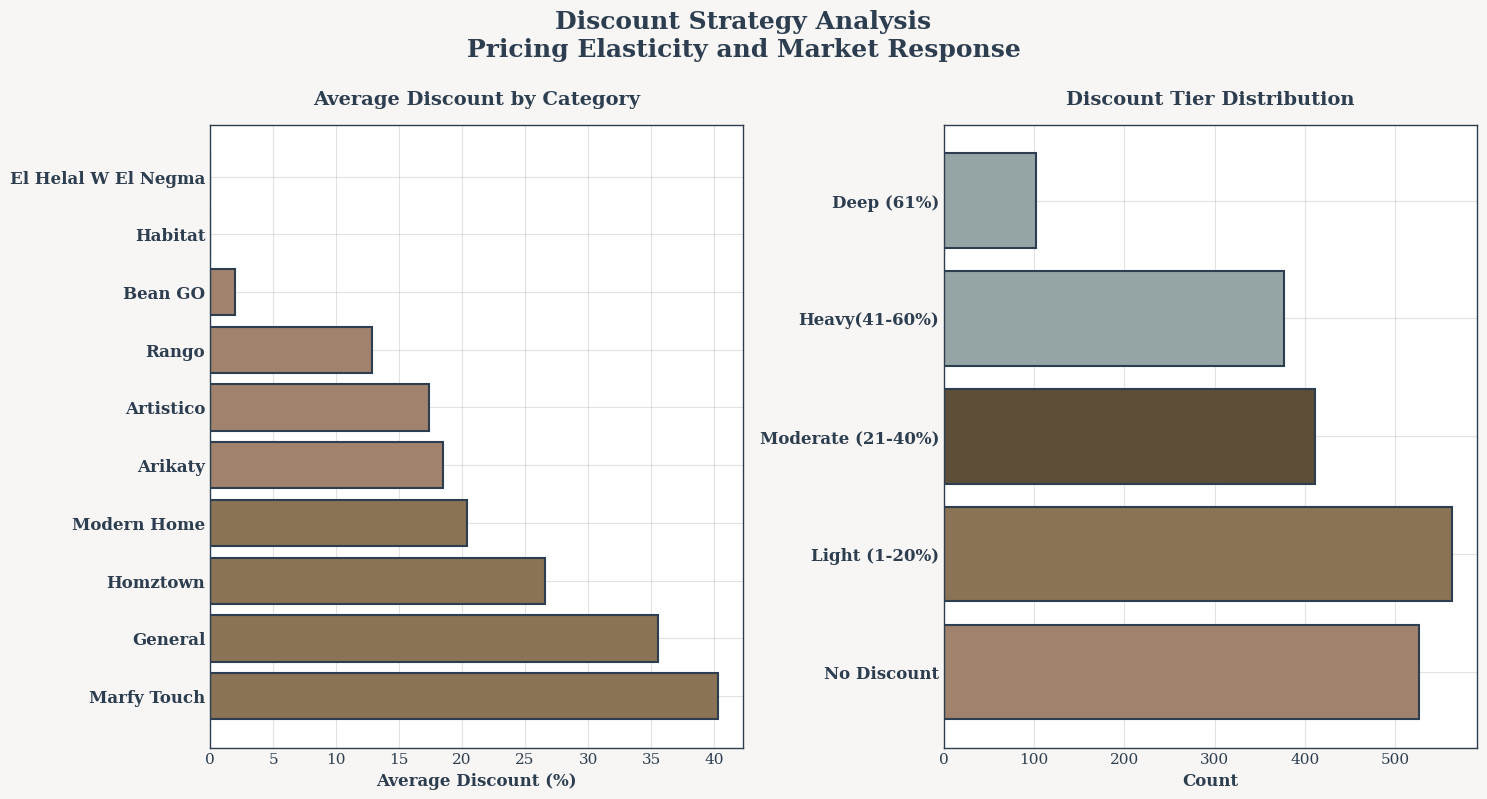

In [245]:
# Visualization Sale Impact Analysis

fig, axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Discount Strategy Analysis\nPricing Elasticity and Market Response',fontsize=18,fontweight='bold',y=0.995)

# 1. Average discount percentage by category
discount_by_cat = df_clean.groupby('type_category')['discount_pct'].agg(['mean','count']).reset_index()
discount_by_cat = discount_by_cat[discount_by_cat['type_category'].isin(top_cats_sale)].sort_values('mean',ascending=True)

colors_discount = [PALETTE['accent3'] if x < 20 else
               PALETTE['secondary'] if x < 50 else
               PALETTE['accent2'] for x in discount_by_cat['mean']]

ax1 = axes[0]
ax1.barh(range(len(discount_by_cat)),discount_by_cat['mean'],color=colors_discount,edgecolor=PALETTE['primary'],linewidth=1.5)
ax1.set_yticks(range(len(discount_by_cat)))
ax1.set_yticklabels(discount_by_cat['type_category'],fontsize=12,fontweight='bold')
ax1.set_xlabel('Average Discount (%)',fontweight='bold')
ax1.set_title('Average Discount by Category',pad=15,fontweight='bold')
ax1.grid(axis='x',alpha=0.3)
ax1.invert_yaxis()

# 2. Discount tier distribution
ax2 = axes[1]
discount_tier_counts = df_clean['discount_tier'].value_counts().sort_index()
colors_tier = [PALETTE['accent3'] if x == 'No Discount' else
               PALETTE['secondary'] if x == 'Light (1-20%)' else
               PALETTE['accent2'] if x == 'Moderate (21-40%)' else
               PALETTE['muted'] for x in discount_tier_counts.index]
bars = ax2.barh(range(len(discount_tier_counts)),discount_tier_counts,color=colors_tier,edgecolor=PALETTE['primary'],linewidth=1.5)
ax2.set_yticks(range(len(discount_tier_counts)))
ax2.set_yticklabels(discount_tier_counts.index,fontsize=12,fontweight='bold')
ax2.set_xlabel('Count',fontweight='bold')
ax2.set_title('Discount Tier Distribution',pad=15,fontweight='bold')
ax2.grid(axis='x',alpha=0.3)


plt.tight_layout()
plt.show()

In [249]:
print("Key Insights: Pricing Strategy")
avg_discount_all = df_clean['discount_pct'].mean()
items_on_sale = (df_clean['discount_pct']>0).sum()
pct_on_sale = (items_on_sale/len(df_clean))*100
print(f"\nAverage Discount across all items: {avg_discount_all:.1f}%")
print(f"Items on Sale: {items_on_sale} ({pct_on_sale:.1f})")
print("Discount Tier Distribution: ")
print(df_clean['discount_tier'].value_counts().sort_index())

Key Insights: Pricing Strategy

Average Discount across all items: 23.3%
Items on Sale: 1454 (73.4)
Discount Tier Distribution: 
discount_tier
No Discount          527
Light (1-20%)        563
Moderate (21-40%)    412
Heavy(41-60%)        377
Deep (61%)           102
Name: count, dtype: int64
